# Projeto AB1
Cálculo Numérico (EAMB018-A / EPET019-A)

**Apresentação sobre Sistemas Lineares**

<span style="color:red">**GABARITO! NÃO DIVULGAR!**</span>.

- Tutores:
    - Leonardo Tolêdo
    - Paulo Victor Santos
    - Ricardo Fernandes

a) Implementar **Gauss-Seidel** e **Gauss-Jacobi**

In [1]:
# Função para atualização do vetor x
cn_update_x(A, b, x, i) = (b[i] - A[i, :] ⋅ x + A[i, i] * x[i]) / A[i, i]
cn_gaussJacobi(A, b, x, x0, i) = cn_update_x(A, b, x0, i)
cn_gaussSeidel(A, b, x, x0, i) = cn_update_x(A, b, x, i)

# Função para solução de sistema de equações lineares por métodos iterativos
function cn_slIter(A, b, x0=zeros(size(b)); met=cn_gaussSeidel, tol=1e-4, maxit=1_000)
    
    n = length(b)
    @assert size(A) == (n, n)
    
    x, nite, err = copy(x0), 0, tol+1

    while err > tol && nite < maxit
            
        for i = 1:n
            x[i] = met(A, b, x, x0, i)
        end
        
        nite, err = nite+1, norm(x-x0)        
        x0 .= x
    end
    return x, nite, err
end;

b) **Montagem dos sistemas** de equações lineares

In [2]:
function assemble_system(n, k=n*1e+6, F=1e+4)
    
    # init data
    K, f = zeros(n, n), zeros(n)
    
    # assemble matrix and vector
    K[1, 1] = k[1]
    for e = 2:n
        ind = [e-1, e]
        K[ind, ind] += k * [1 -1; -1 1]
    end
    f[end] = F
    
    return K, f
end;

In [3]:
# define stiffness and force values
k(n) = 1e+6 * n
F = 1e+4

# assemble systems
K5, f5 = assemble_system(5, k(5), F);
K50, f50 = assemble_system(50, k(50), F);
K100, f100 = assemble_system(100, k(100), F);

c) **Avaliar consistência** dos sistemas

In [4]:
using LinearAlgebra
det_K5, det_K50, det_K100 = det(K5), det(K50), det(K100)
@assert det_K5 ≠ 0
@assert det_K50 ≠ 0
@assert det_K100 ≠ 0

det_K5, det_K50, det_K100

(3.125e33, Inf, Inf)

In [5]:
r_K5, r_K50, r_K100 = rank(K5), rank(K50), rank(K100)
@assert r_K5 == 5
@assert r_K50 == 50
@assert r_K100 == 100

r_K5, r_K50, r_K100

(5, 50, 100)

d) Calcular **número de condição** dos sistemas (norma espectral)

In [6]:
spectral_norm(A) = opnorm(A, 2)
function cond(A, norm_fcn=spectral_norm)
    norm_fcn(A) * norm_fcn(inv(A))
end;

In [7]:
cond(K5), cond(K50), cond(K100)

(45.455164131479236, 4130.643894236511, 16370.242143027646)

e) Calcular **rigidez equivalente e deslocamento na extremidade livre**

In [8]:
Keq(n) = 1/(n/k(n))
Keq(5), Keq(50), Keq(100)

(1.0e6, 1.0e6, 1.0e6)

In [9]:
Δ(n) = F/Keq(n)
Δ(5), Δ(50), Δ(100)

(0.01, 0.01, 0.01)

e) **Resolver** cada sistema **e comparar tempos de execução**

In [10]:
using Printf
function eval(A, b, x0=zeros(size(b)); met=cn_gaussSeidel, tol=1e-5, maxit=100_000)
    println("\n* n=", length(b), ": ", met, ", tol=", tol, ", maxit=", maxit)
    time = @elapsed x, nite, err = cn_slIter(A, b, x0, met=met, tol=tol, maxit=maxit)
    @printf("  nite: %d, err: %g, time: %g s\n", nite, err, time)
    return nite, err, time
end;

# eval first run
cn_slIter(K5, f5, met=cn_gaussJacobi)
cn_slIter(K5, f5, met=cn_gaussSeidel)
x5 = K5 \ f5;

In [11]:
j5_nite, j5_err, j5_time = eval(K5, f5, met=cn_gaussJacobi)
s5_nite, s5_err, s5_time = eval(K5, f5, met=cn_gaussSeidel)
b5_time = @elapsed x5 = K5 \ f5

j50_nite, j50_err, j50_time = eval(K50, f50, met=cn_gaussJacobi)
s50_nite, s50_err, s50_time = eval(K50, f50, met=cn_gaussSeidel)
b50_time = @elapsed x50 = K50 \ f50

j100_nite, j100_err, j100_time = eval(K100, f100, met=cn_gaussJacobi)
s100_nite, s100_err, s100_time = eval(K100, f100, met=cn_gaussSeidel)
b100_time = @elapsed x100 = K100 \ f100;


* n=5: cn_gaussJacobi, tol=1.0e-5, maxit=100000
  nite: 92, err: 9.29652e-06, time: 0.0086071 s

* n=5: cn_gaussSeidel, tol=1.0e-5, maxit=100000
  nite: 51, err: 9.77395e-06, time: 0.0210989 s

* n=50: cn_gaussJacobi, tol=1.0e-5, maxit=100000
  nite: 2108, err: 9.99787e-06, time: 0.0707838 s

* n=50: cn_gaussSeidel, tol=1.0e-5, maxit=100000
  nite: 1423, err: 9.99726e-06, time: 0.0678693 s

* n=100: cn_gaussJacobi, tol=1.0e-5, maxit=100000
  nite: 798, err: 9.99534e-06, time: 0.0449937 s

* n=100: cn_gaussSeidel, tol=1.0e-5, maxit=100000
  nite: 1445, err: 9.99802e-06, time: 0.0902474 s


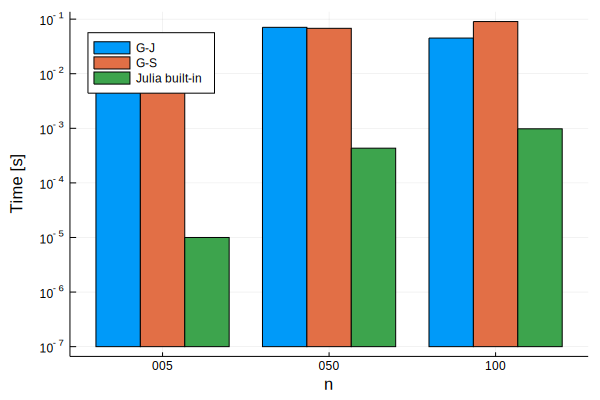

In [12]:
using StatsPlots
nam = repeat(["005", "050", "100"], outer=3)
time = [j5_time s5_time b5_time; j50_time s50_time b50_time; j100_time s100_time b100_time]
label = repeat(["G-J", "G-S", "Julia built-in"], inner=3)

groupedbar(nam, time, group=label, xlabel="n", ylabel="Time [s]", yaxis=:log, legend=:topleft)

g) **Resolver** sistemas **e comparar número de iterações por tolerância**

In [13]:
jt3_nite, jt3_err, jt3_time = eval(K100, f100, met=cn_gaussJacobi, tol=1e-3)
st3_nite, st3_err, st3_time = eval(K100, f100, met=cn_gaussSeidel, tol=1e-3)

jt5_nite, jt5_err, jt5_time = eval(K100, f100, met=cn_gaussJacobi, tol=1e-5)
st5_nite, st5_err, st5_time = eval(K100, f100, met=cn_gaussSeidel, tol=1e-5)

jt7_nite, jt7_err, jt7_time = eval(K100, f100, met=cn_gaussJacobi, tol=1e-7)
st7_nite, st7_err, st7_time = eval(K100, f100, met=cn_gaussSeidel, tol=1e-7);


* n=100: cn_gaussJacobi, tol=0.001, maxit=100000
  nite: 1, err: 0.0001, time: 2.93e-05 s

* n=100: cn_gaussSeidel, tol=0.001, maxit=100000
  nite: 1, err: 0.0001, time: 5.88e-05 s

* n=100: cn_gaussJacobi, tol=1.0e-5, maxit=100000
  nite: 798, err: 9.99534e-06, time: 0.0491389 s

* n=100: cn_gaussSeidel, tol=1.0e-5, maxit=100000
  nite: 1445, err: 9.99802e-06, time: 0.0737101 s

* n=100: cn_gaussJacobi, tol=1.0e-7, maxit=100000
  nite: 37328, err: 9.99947e-08, time: 1.57919 s

* n=100: cn_gaussSeidel, tol=1.0e-7, maxit=100000
  nite: 20104, err: 9.99937e-08, time: 0.864383 s


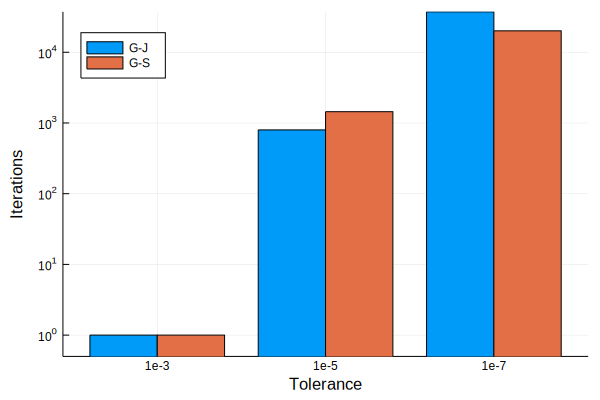

In [14]:
nam = repeat(["1e-3", "1e-5", "1e-7"], outer=2)
time = [jt3_nite st3_nite; jt5_nite st5_nite; jt7_nite st7_nite]
label = repeat(["G-J", "G-S"], inner=3)

groupedbar(nam, time, group=label, xlabel="Tolerance", ylabel="Iterations", yaxis=:log, legend=:topleft, ylims=(0.5,Inf))